In [22]:
 %pip install torch torchvision
 %pip install torchtext
 %pip install transformers

In [23]:
average_train_accuracy_head = []
average_test_accuracy_head = []
std_dev_train_accuracy_head = []
std_dev_test_accuracy_head = []


**Count Vector**

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score
import numpy as np

train_data = pd.read_csv('/content/news-train-1.csv')

vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(train_data['Text']).toarray()


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['Category'])


X_tensor = torch.tensor(X_counts, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.int64)


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


num_splits = 5
stratified_kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

train_accuracies = []
test_accuracies = []


for train_indices, test_indices in stratified_kfold.split(X_tensor, y_tensor):
    X_train_fold = X_tensor[train_indices]
    y_train_fold = y_tensor[train_indices]
    X_test_fold = X_tensor[test_indices]
    y_test_fold = y_tensor[test_indices]

    input_size = X_train_fold.shape[1]
    hidden_size = 128
    output_size = len(label_encoder.classes_)
    classifier = NeuralNetwork(input_size, hidden_size, output_size)


    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)


    num_epochs = 10
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        outputs = classifier(X_train_fold)
        loss = criterion(outputs, y_train_fold)
        loss.backward()
        optimizer.step()


    with torch.no_grad():
        train_outputs = classifier(X_train_fold)
        _, train_predicted = torch.max(train_outputs, 1)
        train_accuracy = accuracy_score(y_train_fold, train_predicted.numpy())
        train_accuracies.append(train_accuracy)

    with torch.no_grad():
        test_outputs = classifier(X_test_fold)
        _, test_predicted = torch.max(test_outputs, 1)
        test_accuracy = accuracy_score(y_test_fold, test_predicted.numpy())
        test_accuracies.append(test_accuracy)


average_train_accuracy = np.mean(train_accuracies)
std_dev_train_accuracy = np.std(train_accuracies)

print(f'Average Training Accuracy: {average_train_accuracy:.3f}')


print(f'Standard Deviation (Training Accuracy): {std_dev_train_accuracy:.3f}')

average_test_accuracy = np.mean(test_accuracies)
std_dev_test_accuracy = np.std(test_accuracies)

print(f'Average Testing Accuracy: {average_test_accuracy:.3f}')

print(f'Standard Deviation (Testing Accuracy): {std_dev_test_accuracy:.3f}')
std_dev_train_accuracy_head.append(std_dev_train_accuracy)
std_dev_test_accuracy_head.append(std_dev_test_accuracy)
average_test_accuracy_head.append(average_test_accuracy)
average_train_accuracy_head.append(average_train_accuracy)

Average Training Accuracy: 0.999
Standard Deviation (Training Accuracy): 0.000
Average Testing Accuracy: 0.962
Standard Deviation (Testing Accuracy): 0.012


**TF-IDF Working**

In [25]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['Category'])


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_data['Text']).toarray()


X_tfidf_tensor = torch.tensor(X_tfidf, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.int64)


num_splits = 5
stratified_kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)


cv_scores_tfidf = []
train_scores_tfidf = []


for train_indices, test_indices in stratified_kfold.split(X_tfidf_tensor, y_tensor):
    X_train_fold = X_tfidf_tensor[train_indices]
    y_train_fold = y_tensor[train_indices]
    X_test_fold = X_tfidf_tensor[test_indices]
    y_test_fold = y_tensor[test_indices]


    classifier_tfidf = NeuralNetwork(input_size=X_tfidf_tensor.shape[1], hidden_size=128, output_size=len(label_encoder.classes_))
    optimizer_tfidf = torch.optim.Adam(classifier_tfidf.parameters(), lr=0.002)
    criterion_tfidf = nn.CrossEntropyLoss()

    num_epochs_tfidf = 10
    for epoch in range(num_epochs_tfidf):
        optimizer_tfidf.zero_grad()
        outputs_tfidf = classifier_tfidf(X_train_fold)
        loss_tfidf = criterion_tfidf(outputs_tfidf, y_train_fold)
        loss_tfidf.backward()
        optimizer_tfidf.step()

    with torch.no_grad():

        train_outputs_tfidf = classifier_tfidf(X_train_fold)
        _, train_predicted_tfidf = torch.max(train_outputs_tfidf, 1)
        train_accuracy_tfidf = accuracy_score(y_train_fold, train_predicted_tfidf.numpy())


        test_outputs_tfidf = classifier_tfidf(X_test_fold)
        _, test_predicted_tfidf = torch.max(test_outputs_tfidf, 1)
        test_accuracy_tfidf = accuracy_score(y_test_fold, test_predicted_tfidf.numpy())

        cv_scores_tfidf.append(test_accuracy_tfidf)
        train_scores_tfidf.append(train_accuracy_tfidf)


average_cv_accuracy_tfidf = np.mean(cv_scores_tfidf)
std_dev_tfidf = np.std(cv_scores_tfidf)
average_train_accuracy_tfidf = np.mean(train_scores_tfidf)
std_dev_train_accuracy_tfidf = np.std(train_scores_tfidf)
print(f'Standard Deviation (TFIDF Training Accuracy): {std_dev_train_accuracy_tfidf:.3f}')
print(f'Average Cross-Validation Accuracy (TFIDF): {average_cv_accuracy_tfidf:.3f}')
print(f'Standard Deviation (TFIDF): {std_dev_tfidf:.3f}')
print(f'Average Training Accuracy (TFIDF): {average_train_accuracy_tfidf:.3f}')
std_dev_train_accuracy_head.append(std_dev_train_accuracy_tfidf)
std_dev_test_accuracy_head.append(std_dev_tfidf)
average_test_accuracy_head.append(average_cv_accuracy_tfidf)
average_train_accuracy_head.append(average_train_accuracy_tfidf)


Standard Deviation (TFIDF Training Accuracy): 0.007
Average Cross-Validation Accuracy (TFIDF): 0.828
Standard Deviation (TFIDF): 0.072
Average Training Accuracy (TFIDF): 0.992


In [26]:
feature_methods = ['CountVectorizer', 'TFIDF']

results_df = pd.DataFrame({
    'Feature Method': feature_methods,
    'Average Training Accuracy': average_train_accuracy_head,
    'Average Testing Accuracy': average_test_accuracy_head,
    'Standard Deviation(Training Accuracy)': std_dev_train_accuracy_head,
    'Standard Deviation(Testing Accuracy)': std_dev_test_accuracy_head
})
display(results_df)

,Feature Method,Average Training Accuracy,Average Testing Accuracy,Standard Deviation(Training Accuracy),Standard Deviation(Testing Accuracy)
0,CountVectorizer,0.999059,0.962348,0.000470,0.012333
1,TFIDF,0.991531,0.827921,0.006755,0.072022


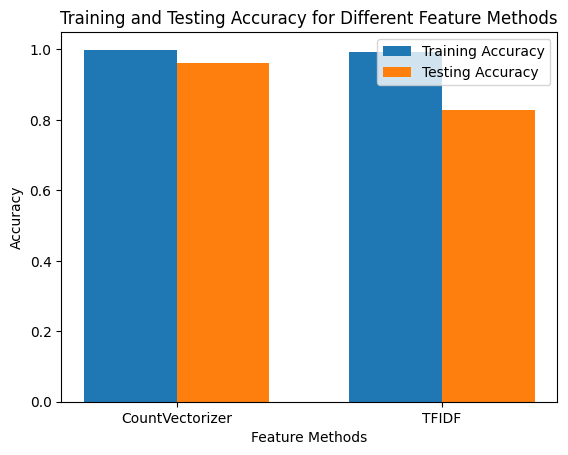

In [27]:
import matplotlib.pyplot as plt


feature_methods = ['CountVectorizer', 'TFIDF']


bar_width = 0.35
index = range(len(feature_methods))

fig, ax = plt.subplots()
train_bar = ax.bar(index, average_train_accuracy_head, bar_width, label='Training Accuracy')
test_bar = ax.bar([p + bar_width for p in index], average_test_accuracy_head, bar_width, label='Testing Accuracy')

ax.set_xlabel('Feature Methods')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy for Different Feature Methods')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(feature_methods)
ax.legend()

plt.show()


In [39]:
import numpy as np

learning_rates = [0.0001, 0.0003, 0.003, 0.01, 0.03,0.05, 0.1]
cv_results_lr = []

for lr in learning_rates:
    optimizer = torch.optim.Adam(classifier.parameters(), lr=lr)
    fold_accuracies = []

    for train_indices, test_indices in stratified_kfold.split(X_tensor, y_tensor):
        X_train_fold = X_tensor[train_indices]
        y_train_fold = y_tensor[train_indices]
        X_test_fold = X_tensor[test_indices]
        y_test_fold = y_tensor[test_indices]

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = classifier(X_train_fold)
            loss = criterion(outputs, y_train_fold)
            loss.backward()
            optimizer.step()

        with torch.no_grad():

            train_outputs = classifier(X_train_fold)
            _, train_predicted = torch.max(train_outputs, 1)
            train_accuracy = accuracy_score(y_train_fold, train_predicted.numpy())

            test_outputs = classifier(X_test_fold)
            _, test_predicted = torch.max(test_outputs, 1)
            accuracy = accuracy_score(y_test_fold, test_predicted.numpy())
            fold_accuracies.append((train_accuracy, accuracy))

    train_avg_accuracy, val_avg_accuracy = np.mean([x[0] for x in fold_accuracies]), np.mean([x[1] for x in fold_accuracies])
    train_std_dev, val_std_dev = np.std([x[0] for x in fold_accuracies]), np.std([x[1] for x in fold_accuracies])
    cv_results_lr.append((lr, train_avg_accuracy, val_avg_accuracy, train_std_dev, val_std_dev))


val_for_line =[]
train_for_line = []


print("Learning Rate\tTrain Avg Accuracy\tVal Avg Accuracy\tTrain Std Dev\tVal Std Dev")
for lr, train_avg_accuracy, val_avg_accuracy, train_std_dev, val_std_dev in cv_results_lr:
    val_for_line.append(val_avg_accuracy)
    train_for_line.append(train_avg_accuracy)
    print(f"{lr}\t\t{train_avg_accuracy:.3f}\t\t\t{val_avg_accuracy:.3f}\t\t{train_std_dev:.3f}\t\t\t{val_std_dev:.3f}")


Learning Rate	Train Avg Accuracy	Val Avg Accuracy	Train Std Dev	Val Std Dev
0.0001		1.000			0.999		0.001			0.002
0.0003		1.000			0.999		0.000			0.002
0.003		1.000			1.000		0.000			0.000
0.01		1.000			0.997		0.000			0.006
0.03		1.000			0.992		0.000			0.017
0.05		1.000			0.993		0.000			0.011
0.1		1.000			0.993		0.000			0.013


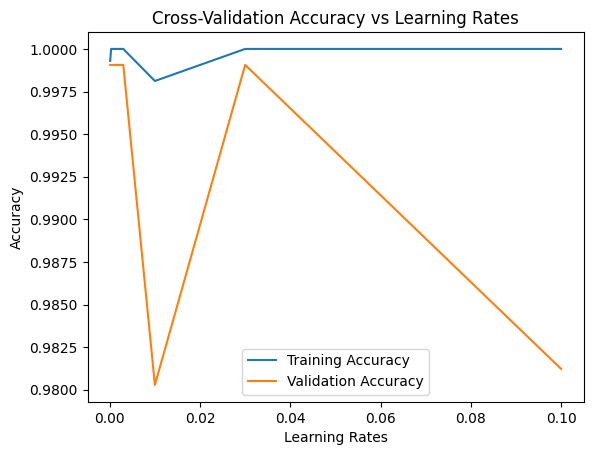

In [29]:
import matplotlib.pyplot as plt

plt.plot(learning_rates, [score for score in train_for_line], label='Training Accuracy')
plt.plot(learning_rates, [score for score in val_for_line], label='Validation Accuracy')
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy vs Learning Rates')
#plt.xscale('log')
plt.legend()

plt.show()






In [30]:
optimizers = ['SGD', 'Adam', 'RMSprop']
cv_results_optimizers = []

for opt in optimizers:
    fold_accuracies_train = []
    fold_accuracies_val = []

    for train_indices, val_indices in stratified_kfold.split(X_tensor, y_tensor):
        X_train_fold = X_tensor[train_indices]
        y_train_fold = y_tensor[train_indices]
        X_val_fold = X_tensor[val_indices]
        y_val_fold = y_tensor[val_indices]

        input_size = X_train_fold.shape[1]
        hidden_size = 128
        output_size = len(label_encoder.classes_)
        classifier = NeuralNetwork(input_size, hidden_size, output_size)

        if opt == 'SGD':
            optimizer = torch.optim.SGD(classifier.parameters(), lr=0.001)
        elif opt == 'Adam':
            optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
        elif opt == 'RMSprop':
            optimizer = torch.optim.RMSprop(classifier.parameters(), lr=0.001)

        for epoch in range(num_epochs):
            optimizer.zero_grad()
            outputs = classifier(X_train_fold)
            loss = criterion(outputs, y_train_fold)
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            train_outputs = classifier(X_train_fold)
            _, train_predicted = torch.max(train_outputs, 1)
            train_accuracy = accuracy_score(y_train_fold, train_predicted.numpy())
            fold_accuracies_train.append(train_accuracy)


        with torch.no_grad():
            val_outputs = classifier(X_val_fold)
            _, val_predicted = torch.max(val_outputs, 1)
            val_accuracy = accuracy_score(y_val_fold, val_predicted.numpy())
            fold_accuracies_val.append(val_accuracy)

    avg_train_accuracy = np.mean(fold_accuracies_train)
    std_dev_train_accuracy = np.std(fold_accuracies_train)
    avg_val_accuracy = np.mean(fold_accuracies_val)
    std_dev_val_accuracy = np.std(fold_accuracies_val)

    cv_results_optimizers.append((opt, avg_train_accuracy, std_dev_train_accuracy, avg_val_accuracy, std_dev_val_accuracy))

print("Optimizer\tAverage Train Accuracy\tTrain Accuracy Std Dev\tAverage Val Accuracy\tVal Accuracy Std Dev")
for opt, avg_train_acc, std_dev_train_acc, avg_val_acc, std_dev_val_acc in cv_results_optimizers:
    print(f"{opt}\t\t{avg_train_acc:.3f}\t\t\t\t{std_dev_train_acc:.3f}\t\t\t{avg_val_acc:.3f}\t\t\t\t{std_dev_val_acc:.3f}")


Optimizer	Average Train Accuracy	Train Accuracy Std Dev	Average Val Accuracy	Val Accuracy Std Dev
SGD		0.229				0.030			0.239				0.032
Adam		0.999				0.001			0.966				0.012
RMSprop		1.000				0.000			0.960				0.018


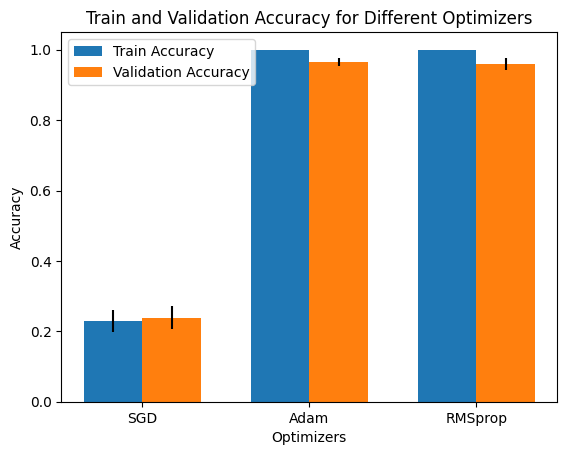

In [31]:
import matplotlib.pyplot as plt

optimizers = [result[0] for result in cv_results_optimizers]
train_accuracies = [result[1] for result in cv_results_optimizers]
train_std_devs = [result[2] for result in cv_results_optimizers]
val_accuracies = [result[3] for result in cv_results_optimizers]
val_std_devs = [result[4] for result in cv_results_optimizers]

x = np.arange(len(optimizers))

fig, ax = plt.subplots()
bar_width = 0.35

rects1 = ax.bar(x - bar_width/2, train_accuracies, bar_width, label='Train Accuracy', yerr=train_std_devs)
rects2 = ax.bar(x + bar_width/2, val_accuracies, bar_width, label='Validation Accuracy', yerr=val_std_devs)

ax.set_xlabel('Optimizers')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracy for Different Optimizers')
ax.set_xticks(x)
ax.set_xticklabels(optimizers)
ax.legend()

plt.show()


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

test_data = pd.read_csv('/content/news-test.csv')

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train_data['Text']).toarray()
X_test_counts = vectorizer.transform(test_data['Text']).toarray()


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(train_data['Category'])


X_train_features = X_train_counts
y_train = torch.tensor(y_encoded, dtype=torch.int64)
X_test_features = X_test_counts


In [33]:
import torch
import torch.nn as nn


class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x


input_size = X_train_features.shape[1]
hidden_size = 128
output_size = len(label_encoder.classes_)
classifier = NeuralNetwork(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)


In [34]:

num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = classifier(torch.tensor(X_train_features, dtype=torch.float32))
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

with torch.no_grad():
    train_outputs = classifier(torch.tensor(X_train_features, dtype=torch.float32))
    _, train_predicted = torch.max(train_outputs, 1)
    train_accuracy = accuracy_score(y_train, train_predicted.numpy())
    print(f'Training Accuracy: {train_accuracy:.3f}')


Training Accuracy: 0.999


In [35]:

with torch.no_grad():
    test_outputs = classifier(torch.tensor(X_test_features, dtype=torch.float32))
    _, test_predicted = torch.max(test_outputs, 1)

predicted_labels = label_encoder.inverse_transform(test_predicted.numpy())


results_df = pd.DataFrame({'Article ID': test_data['ArticleId'], 'Predicted Category': predicted_labels})
results_df.to_csv('labels.csv', header=False, index=False)
